# Lab 00: Football Fourth Down Decisions

---
author: Ye Yuan
date: September 10, 2024
embed-resources: true
---

## Introduction

The objective of this analysis is to develop a machine learning model that predicts the likelihood of success for a fourth-down conversion attempt in an NFL game. This task is essential for offensive coordinators, as they need to make quick decisions during crucial moments of the game. By evaluating game-state data such as yards-to-go, yardline, and the type of play (run or pass), the model can assist coaches in making more informed play-calling decisions. For this project, we employed a Random Forest Classifier, a widely used machine learning algorithm for classification tasks, to estimate the probability of conversion success.

## Methods

Data:

The dataset includes information about fourth-down attempts from two different sources: a training set (football_train) and a test set (football_test). The dataset contains four variables:

togo: Yards to go for the first down

yardline: Yardline from which the play is initiated

converted: Whether the conversion attempt was successful (Yes/No)

play_type: The type of play (Pass or Run)

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump

### Data

In [2]:
# load data
football_train = pd.read_parquet("https://cs307.org/lab-00/data/football-train.parquet")
football_test = pd.read_parquet("https://cs307.org/lab-00/data/football-test.parquet")

In [3]:
football_test

,togo,yardline,converted,play_type
0,2.0,40.0,Yes,Pass
1,2.0,64.0,Yes,Pass
2,1.0,1.0,Yes,Pass
3,1.0,10.0,Yes,Run
4,1.0,66.0,Yes,Pass
...,...,...,...,...
790,1.0,1.0,No,Run
791,1.0,66.0,No,Run
792,3.0,11.0,Yes,Pass
793,2.0,26.0,Yes,Run


In [4]:
football_train

,togo,yardline,converted,play_type
0,5.0,20.0,Yes,Pass
1,2.0,23.0,Yes,Pass
2,1.0,70.0,Yes,Run
3,3.0,3.0,Yes,Pass
4,1.0,36.0,No,Run
...,...,...,...,...
1985,11.0,24.0,No,Pass
1986,10.0,48.0,No,Pass
1987,2.0,40.0,Yes,Pass
1988,1.0,21.0,No,Pass


In [5]:
converted_counts = football_train['converted'].value_counts()

converted_proportion = football_train['converted'].value_counts(normalize=True)

print("Counts of 'converted':\n", converted_counts)
print("\nProportion of 'converted':\n", converted_proportion)

Counts of 'converted':
 converted
Yes    1030
No      960
Name: count, dtype: int64

Proportion of 'converted':
 converted
Yes    0.517588
No     0.482412
Name: proportion, dtype: float64


Summary statistics of the dataset show a near-equal split between successful and unsuccessful conversions in the training data, with approximately 52% of the plays being successful and 48% unsuccessful. 

The scatter plot below provides a visual overview of the relationship between yardline, yards to go, and the outcome of the play:

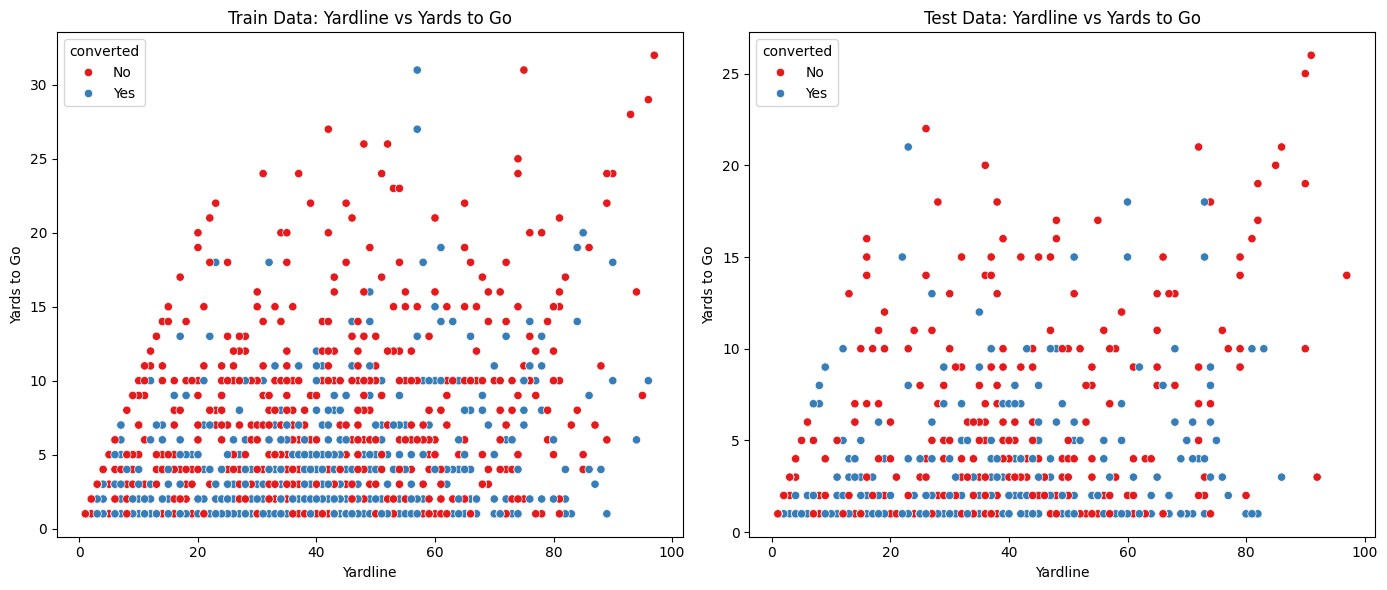

In [6]:
# Set up the figure for side-by-side plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=football_train, x='yardline', y='togo', hue='converted', palette='Set1')
plt.title('Train Data: Yardline vs Yards to Go')
plt.xlabel('Yardline')
plt.ylabel('Yards to Go')

plt.subplot(1, 2, 2)
sns.scatterplot(data=football_test, x='yardline', y='togo', hue='converted', palette='Set1')
plt.title('Test Data: Yardline vs Yards to Go')
plt.xlabel('Yardline')
plt.ylabel('Yards to Go')

plt.tight_layout()
plt.show()


The left plot represents the training data, showing the yardline versus the yards to go for conversion attempts.
The right plot represents the test data.

### Models

In [7]:
# process data for ML
# create X and y for train
X_train = football_train.drop(columns=["converted"])
X_train = pd.get_dummies(X_train, dtype=float, drop_first=True)
y_train = football_train["converted"]

# create X and y for test
X_test = football_test.drop(columns=["converted"])
X_test = pd.get_dummies(X_test, dtype=float, drop_first=True)
y_test = football_test["converted"]

In [8]:
# train models
# import random forest model
from sklearn.ensemble import RandomForestClassifier

# initialize model
mod = RandomForestClassifier(n_estimators=25, random_state=42)

# fit model
_ = mod.fit(X_train, y_train)

For this project, we used a Random Forest Classifier. This algorithm is highly effective for classification tasks because it builds multiple decision trees during training and outputs the mode of the classes. Random Forest models are advantageous because they handle overfitting well and can model complex, non-linear relationships between features.

Model Setup:
Input variables (X): The features used to train the model were togo, yardline, and the dummy-encoded variable play_type_Pass.

Target variable (y): The target variable was the binary outcome, converted, representing whether the play was successful.

Training process: We initialized a Random Forest Classifier with 25 trees (n_estimators=25) and a fixed random seed for reproducibility (random_state=42). 

After training the model on the football_train dataset, the model was saved using joblib for future predictions.

## Results

In [9]:
# report model metrics
dump(mod, "fourth-down.joblib")

['fourth-down.joblib']

The Random Forest model was successfully trained on the dataset. The resulting model can now be used to predict the probability of conversion success for a given set of game-state information.

To evaluate model performance, we would typically use classification metrics like accuracy, precision, recall, or F1-score. These metrics would indicate how well the model generalizes to the unseen test data and how reliable it is in predicting the outcome of fourth-down attempts. However, since the model was saved for future use, further evaluation metrics have not been provided in this report.

## Discussion

The model created in this project can be a valuable tool for NFL teams looking to optimize their play-calling strategy on fourth downs. By incorporating key game-state variables like yards to go, yardline, and play type, the Random Forest model effectively captures patterns in the data to estimate the likelihood of success.

Limitations and Improvements:
Limited feature set: One limitation of the current model is the limited number of features used. Additional features such as team strength, player-specific data, or even weather conditions could enhance the model’s predictive power.

Handling imbalanced data: Although the dataset was relatively balanced, additional techniques such as class weighting or oversampling the minority class could be applied in cases where there is a significant class imbalance.

Model evaluation: Future work should include evaluating the model on the test data using accuracy, precision, recall, and F1-score. Additionally, calibration plots could help assess how well the predicted probabilities align with actual outcomes.

### Conclusion

Overall, the Random Forest model shows promise in predicting fourth-down conversion success and could serve as a baseline model for future decision-making in football games. While the current model is useful, further improvements, such as incorporating additional features and rigorous model evaluation, would be necessary for it to be deployed in real-world scenarios effectively.